# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, ward, single
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [7]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [10]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
# feel free to investigate what you want

In [4]:
#correlation matrix
df_copy=df.copy()
corr_matrix = df_copy.corr()
corr_matrix[corr_matrix<=0.5]

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                                NaN           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412                NaN   0.133674   
PURCHASES                         0.181261           0.133674        NaN   
ONEOFF_PURCHASES                  0.164350           0.104323        NaN   
INSTALLMENTS_PURCHASES            0.126469           0.124292        NaN   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626        NaN   
CREDIT_LIMIT                           NaN           0.095843   0.356963   
PAYMENTS                          0.322802           0.065008        NaN   
MINIMUM_PAYMENTS                  0.398684           0.132569   0.093860   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                      NaN                     NaN   
ONEOFF_PURCHASES                               NaN                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                     NaN   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                     NaN                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                     NaN   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                                  NaN                     NaN   
CREDIT_LIMIT                              0.319724                0.256499   
PAYMENTS                                       NaN                0.384084   
MINIMUM_PAYMENTS                          0.048755                0.132172   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                               NaN            -0.215507   
PURCHASES_FREQUENCY                  -0.215507                  NaN   
ONEOFF_PURCHASES_FREQUENCY           -0.086754                  NaN   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070                  NaN   
CASH_ADVANCE_FREQUENCY                     NaN            -0.308478   
CASH_ADVANCE_TRX                           NaN            -0.203478   
PURCHASES_TRX                        -0.075850                  NaN   
CREDIT_LIMIT                          0.303985             0.119788   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140107             0.003030   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- handle missing values          <br>
2- drop not necessary column      <br>
3-           <br>

In [5]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
#handle the missing values

In [7]:
missing = df_copy.isnull().sum()
missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#solution
#handeling None values of MINIMUM_PAYMENTS by 0 and CREDIT_LIMIT with KNN imputer to fill it with the mean of the clossest observations

In [8]:
df_copy['MINIMUM_PAYMENTS'] = df_copy['MINIMUM_PAYMENTS'].apply(lambda val: 0 if pd.isnull(val) else val)

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_copy[['CREDIT_LIMIT']] = imputer.fit_transform(df_copy[['CREDIT_LIMIT']])


In [10]:
#test
df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second issue**

In [20]:
#the description tell us that the max is 1
len(df[df['CASH_ADVANCE_FREQUENCY'] > 1])

8

In [11]:
#there is just 8 records that are above 8, so let's drop them
df.drop(df[df['CASH_ADVANCE_FREQUENCY'] > 1].index, inplace=True)
df.shape

(8942, 18)

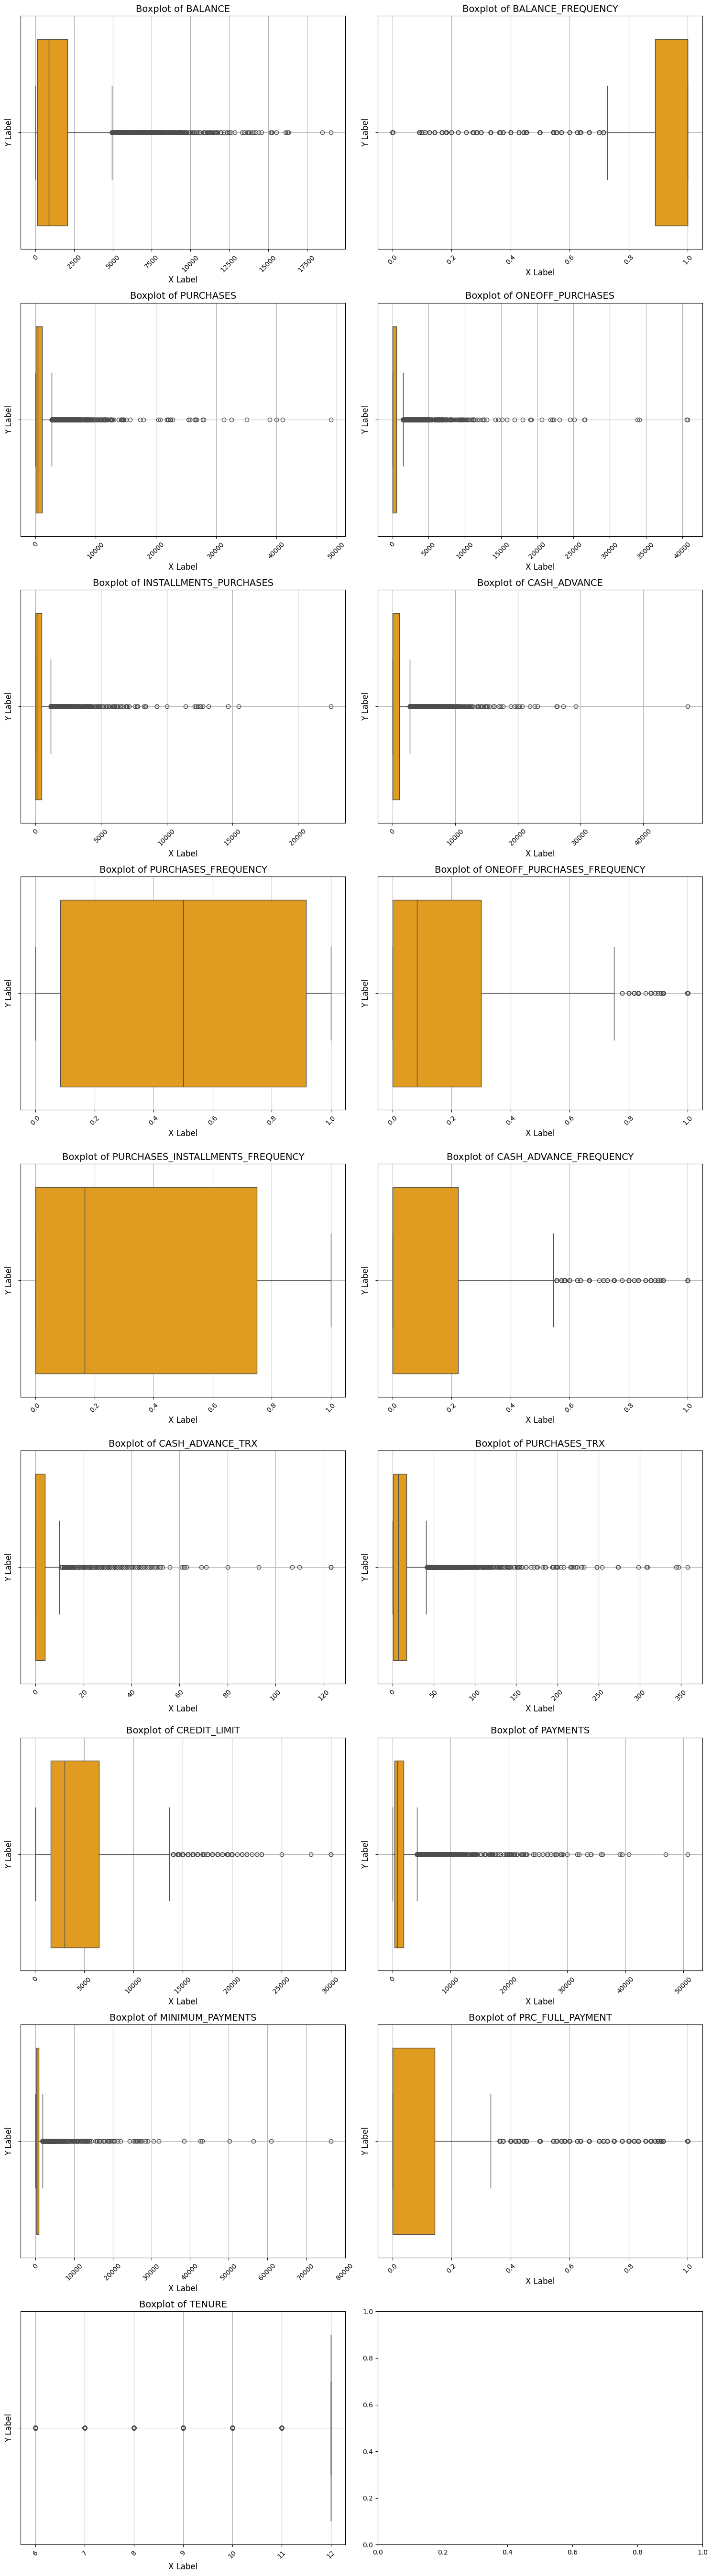

In [12]:
# Get the list of columns in your DataFrame
columns = df.drop(columns='CUST_ID').columns

# Define the number of rows and columns for subplots based on the number of columns
num_rows = (len(columns) + 1) // 2  # Add 1 and then divide to ensure at least 1 row
num_cols = 2  # Two columns of subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

# Flatten axes if necessary
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterate over each column and create a boxplot:
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('X Label', fontsize=12)
    axes[i].set_ylabel('Y Label', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
# Define a function to drop outliers based on a specified criteria
def drop_outliers(df, columns, threshold=1.5):

    df_out = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
        print(f"Column {col} has number of outliers = {df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]}")
    return df_out

columns_to_check = df.drop(columns='CUST_ID').columns

df_cleaned = drop_outliers(df, columns_to_check)

df_cleaned.reset_index(drop=True, inplace=True)

print(df_cleaned.shape)

Column BALANCE has number of outliers = 703
Column BALANCE_FREQUENCY has number of outliers = 1493
Column PURCHASES has number of outliers = 808
Column ONEOFF_PURCHASES has number of outliers = 1012
Column INSTALLMENTS_PURCHASES has number of outliers = 867
Column CASH_ADVANCE has number of outliers = 1028
Column PURCHASES_FREQUENCY has number of outliers = 0
Column ONEOFF_PURCHASES_FREQUENCY has number of outliers = 782
Column PURCHASES_INSTALLMENTS_FREQUENCY has number of outliers = 0
Column CASH_ADVANCE_FREQUENCY has number of outliers = 517
Column CASH_ADVANCE_TRX has number of outliers = 797
Column PURCHASES_TRX has number of outliers = 766
Column CREDIT_LIMIT has number of outliers = 248
Column PAYMENTS has number of outliers = 807
Column MINIMUM_PAYMENTS has number of outliers = 841
Column PRC_FULL_PAYMENT has number of outliers = 1474
Column TENURE has number of outliers = 1358
(2942, 18)


In [14]:
df_cleaned.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10005   817.714335           1.000000      16.00             16.00   
2  C10008  1823.652743           1.000000     436.20              0.00   
3  C10009  1014.926473           1.000000     861.49            661.49   
4  C10015  2772.772734           1.000000       0.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4       0.00000             0.166667   
1                     0.0       0.00000             0.083333   
2                   436.2       0.00000             1.000000   
3                   200.0       0.00000             0.333333   
4                     0.0     346.81139             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.083333                          0.000000   
2                    0.000000                          1.000000   
3                    0.083333                          0.250000   
4                    0.000000                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.000000                 0              1        1200.0   
2                0.000000                 0             12        2300.0   
3                0.000000                 0              5        7000.0   
4                0.083333                 1              0        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12  
1  678.334763        244.791237               0.0      12  
2  679.065082        532.033990               0.0      12  
3  688.278568        311.963409               0.0      12  
4  805.647974        989.962866               0.0      12

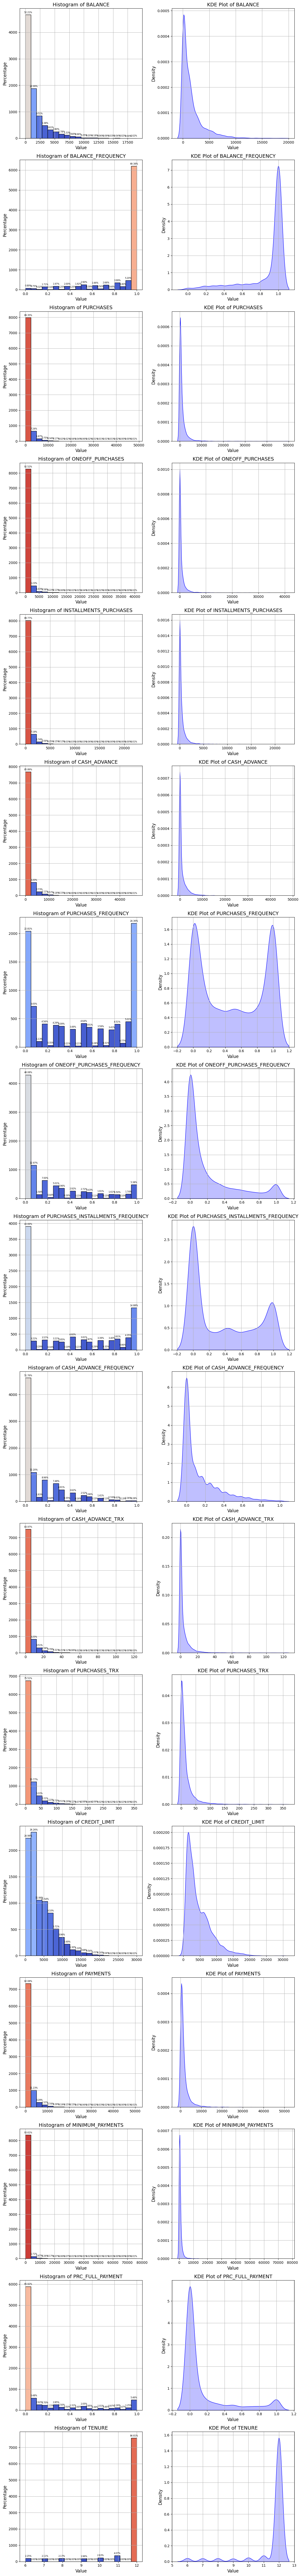

In [15]:
#we can't drop 60% of data , so I'll investigate the distribution of data
import matplotlib.cm as cm

columns_to_plot = df.drop(columns='CUST_ID').columns

# Set up the figure and axes for subplots
num_rows = len(columns_to_plot)
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

# Flatten axes if necessary
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Define a colormap
color_map = cm.get_cmap('coolwarm')

# Plot histograms and KDE plots for each column
for i, col in enumerate(columns_to_plot):
    # Histogram
    total = len(df[col])
    sns.histplot(df[col], ax=axes[i*2], kde=False, color='orange', bins=20)
    axes[i*2].set_title(f'Histogram of {col}', fontsize=14)
    axes[i*2].set_xlabel('Value', fontsize=12)
    axes[i*2].set_ylabel('Percentage', fontsize=12)
    axes[i*2].grid(True)
    for j, rect in enumerate(axes[i*2].patches):
        height = rect.get_height()
        percentage = height/total
        color = color_map(percentage)
        rect.set_facecolor(color)
        axes[i*2].annotate(f'{percentage:.2%}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom', fontsize=6)

    # KDE plot
    sns.kdeplot(df[col], ax=axes[i*2+1], color='blue', shade=True)
    axes[i*2+1].set_title(f'KDE Plot of {col}', fontsize=14)
    axes[i*2+1].set_xlabel('Value', fontsize=12)
    axes[i*2+1].set_ylabel('Density', fontsize=12)
    axes[i*2+1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


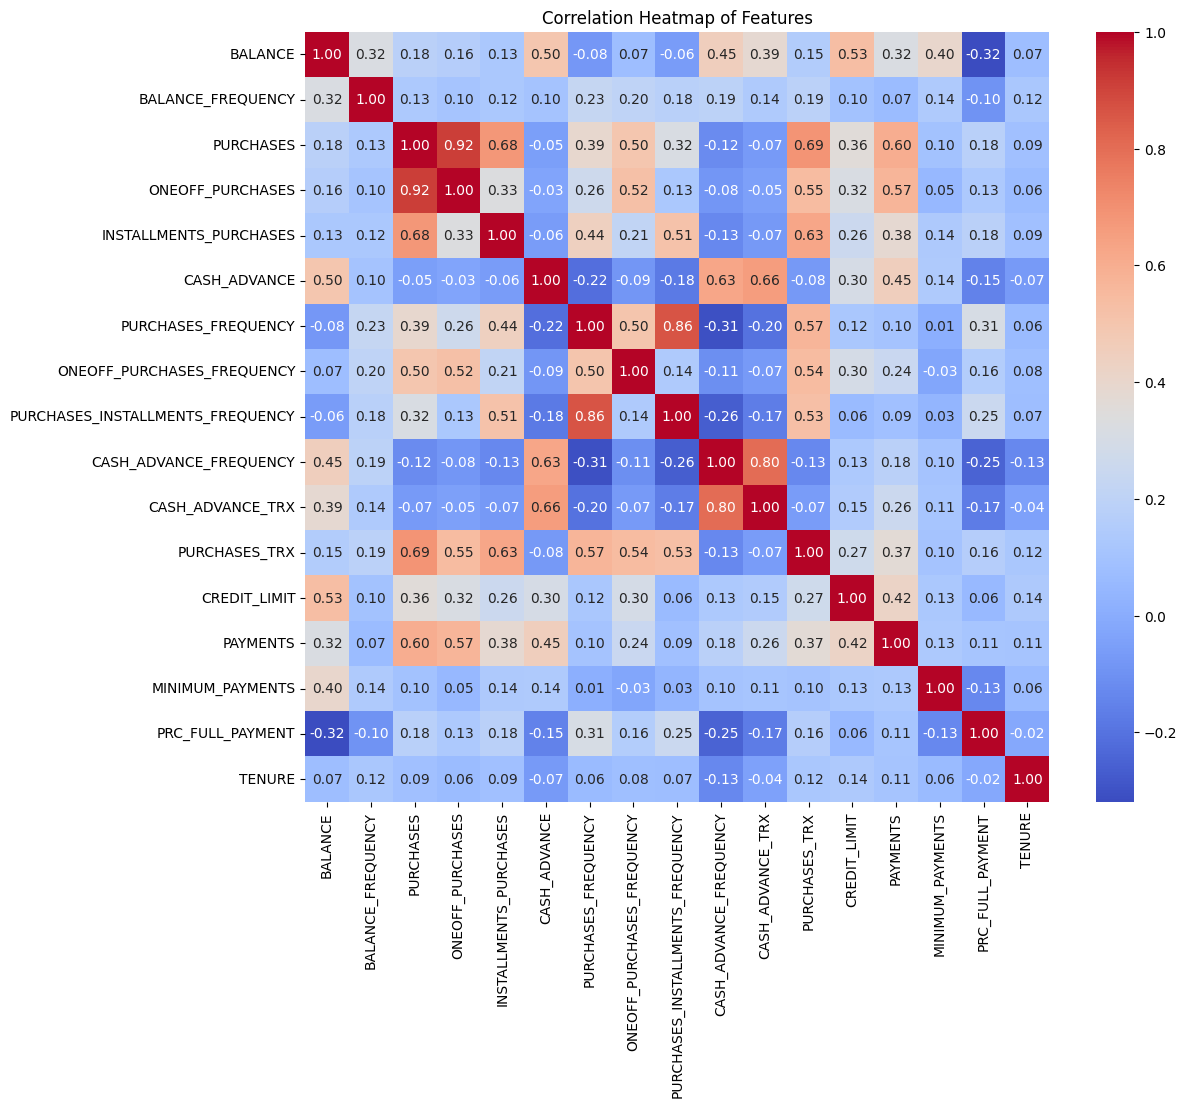

In [16]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(df_copy.drop(columns='CUST_ID'), rowvar=False)

col_names = df_copy.drop(columns='CUST_ID').columns.tolist()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=col_names, yticklabels=col_names)
plt.title("Correlation Heatmap of Features")
plt.show()


In [17]:
df.columns.to_list()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [18]:
open_limits_features = ['BALANCE',
                          'PURCHASES',
                          'ONEOFF_PURCHASES',
                          'INSTALLMENTS_PURCHASES',
                          'CASH_ADVANCE',  'CREDIT_LIMIT',
                          'PAYMENTS',
                          'MINIMUM_PAYMENTS',
                          'CASH_ADVANCE_TRX',
                          'PURCHASES_TRX'
                          ]
bounded_limits_features = ['CUST_ID',
                      'BALANCE_FREQUENCY',
                      'PURCHASES_FREQUENCY',
                      'ONEOFF_PURCHASES_FREQUENCY',
                      'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY',
                      'PRC_FULL_PAYMENT',
                      'TENURE' ]
log_scaled_data = np.log1p(df_copy.drop(columns='CUST_ID')[open_limits_features])
log_scaled_data[bounded_limits_features] = df_copy[bounded_limits_features]
log_scaled_data.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
3  7.419183   7.313220          7.313220                0.000000   
4  6.707735   2.833213          2.833213                0.000000   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  CASH_ADVANCE_TRX  \
0      0.000000      6.908755  5.312231          4.945277          0.000000   
1      8.770896      8.853808  8.319725          6.978531          1.609438   
2      0.000000      8.922792  6.434654          6.442994          0.000000   
3      5.331694      8.922792  0.000000          0.000000          0.693147   
4      0.000000      7.090910  6.521114          5.504483          0.000000   

   PURCHASES_TRX CUST_ID  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0       1.098612  C10001           0.818182             0.166667   
1       0.000000  C10002           0.909091             0.000000   
2       2.564949  C10003           1.000000             1.000000   
3       0.693147  C10004           0.636364             0.083333   
4       0.693147  C10005           1.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  TENURE  
0                0.000000          0.000000      12  
1                0.250000          0.222222      12  
2                0.000000          0.000000      12  
3                0.083333          0.000000      12  
4                0.000000          0.000000      12

In [19]:
log_scaled_data.isna().sum()

BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CUST_ID                             0
BALANCE_FREQUENCY                   0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
log_scaled_data.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8950.000000  8950.000000       8950.000000             8950.000000   
mean      6.161637     4.899647          3.204274                3.352403   
std       2.013303     2.916872          3.246365                3.082973   
min       0.000000     0.000000          0.000000                0.000000   
25%       4.861995     3.704627          0.000000                0.000000   
50%       6.773521     5.892417          3.663562                4.499810   
75%       7.628099     7.013133          6.360274                6.151961   
max       9.854515    10.800403         10.615512               10.021315   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
count   8950.000000   8950.000000  8950.000000       8950.000000   
mean       3.319086      8.094870     6.624540          5.715084   
std        3.566298      0.819635     1.591763          1.597340   
min        0.000000      3.931826     0.000000          0.000000   
25%        0.000000      7.378384     5.951361          5.100038   
50%        0.000000      8.006701     6.754489          5.672045   
75%        7.016449      8.779711     7.550732          6.671670   
max       10.760839     10.308986    10.834125         11.243832   

       CASH_ADVANCE_TRX  PURCHASES_TRX  BALANCE_FREQUENCY  \
count       8950.000000    8950.000000        8950.000000   
mean           0.817570       1.894731           0.877271   
std            1.009316       1.373856           0.236904   
min            0.000000       0.000000           0.000000   
25%            0.000000       0.693147           0.888889   
50%            0.000000       2.079442           1.000000   
75%            1.609438       2.890372           1.000000   
max            4.820282       5.883322           1.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.490351                    0.202458   
std               0.401371                    0.298336   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.300000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.364437                0.135144   
std                            0.397448                0.200121   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.222222   
max                            1.000000                1.500000   

       PRC_FULL_PAYMENT       TENURE  
count       8950.000000  8950.000000  
mean           0.153715    11.517318  
std            0.292499     1.338331  
min            0.000000     6.000000  
25%            0.000000    12.000000  
50%            0.000000    12.000000  
75%            0.142857    12.000000  
max            1.000000    12.000000

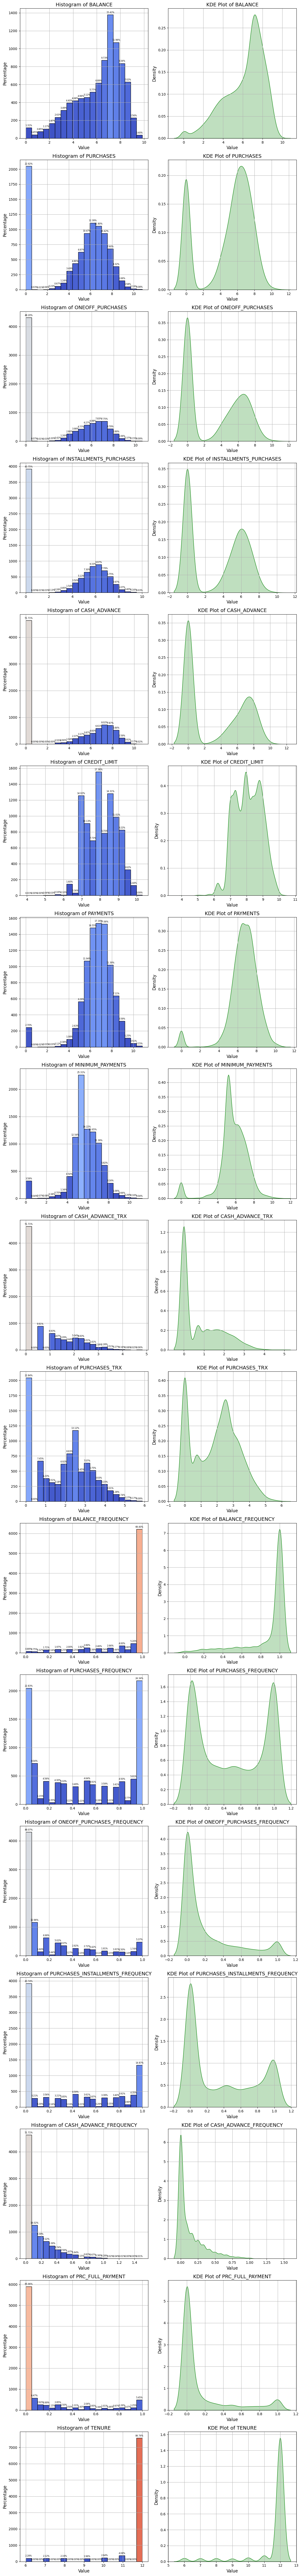

In [21]:
import matplotlib.cm as cm

columns_to_plot = log_scaled_data.drop(columns='CUST_ID').columns

num_rows = len(columns_to_plot)
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Define a colormap
color_map = cm.get_cmap('coolwarm')

# Plot histograms and KDE plots for each column
for i, col in enumerate(columns_to_plot):
    # Histogram
    total = len(log_scaled_data[col])
    sns.histplot(log_scaled_data[col], ax=axes[i*2], kde=False, color='blue', bins=20)
    axes[i*2].set_title(f'Histogram of {col}', fontsize=14)
    axes[i*2].set_xlabel('Value', fontsize=12)
    axes[i*2].set_ylabel('Percentage', fontsize=12)
    axes[i*2].grid(True)
    for j, rect in enumerate(axes[i*2].patches):
        height = rect.get_height()
        percentage = height/total
        color = color_map(percentage)
        rect.set_facecolor(color)
        axes[i*2].annotate(f'{percentage:.2%}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                           textcoords="offset points", ha='center', va='bottom', fontsize=6)  # Adjust font size here

    # KDE plot
    sns.kdeplot(log_scaled_data[col], ax=axes[i*2+1], color='green', shade=True)
    axes[i*2+1].set_title(f'KDE Plot of {col}', fontsize=14)
    axes[i*2+1].set_xlabel('Value', fontsize=12)
    axes[i*2+1].set_ylabel('Density', fontsize=12)
    axes[i*2+1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


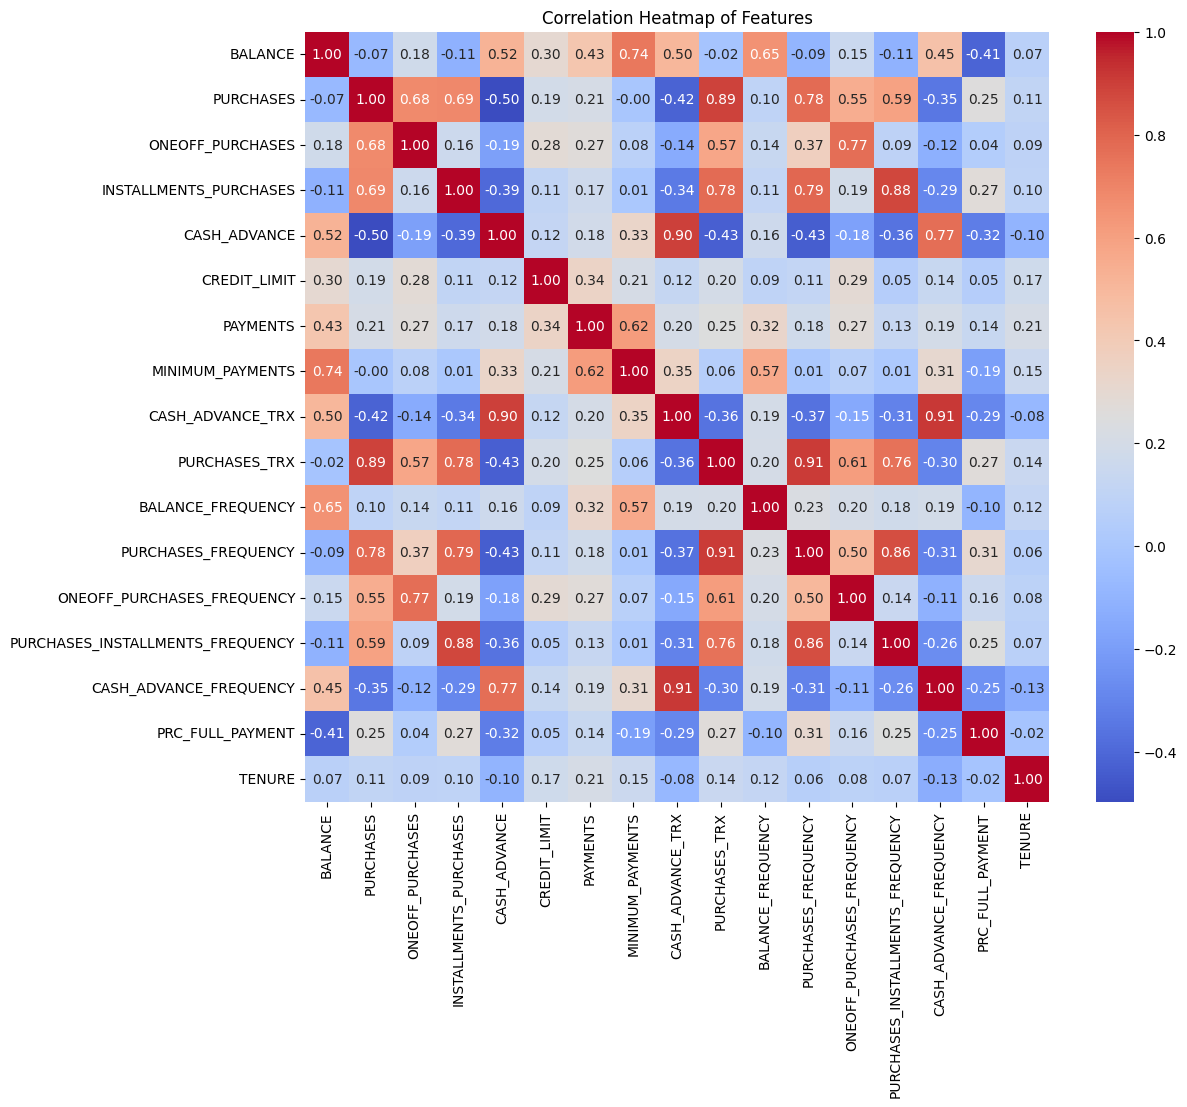

In [22]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(log_scaled_data.drop(columns='CUST_ID'), rowvar=False)

col_names = log_scaled_data.drop(columns='CUST_ID').columns.tolist()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=col_names, yticklabels=col_names)
plt.title("Correlation Heatmap of Features")
plt.show()


Let's calculate inertia and silhouette

In [24]:
#1. for log scaled data
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, n_init=50)
    kmean.fit(log_scaled_data.drop(columns='CUST_ID'))
    cost.append(kmean.inertia_)

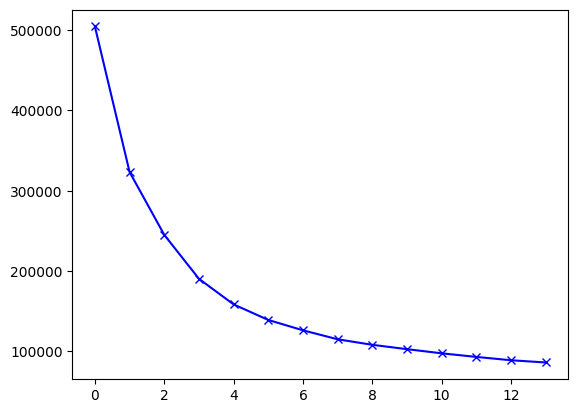

In [25]:
plt.plot(cost, 'bx-')

In [26]:
def calc_plot_silhouette(data_frame):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    for i in range(3, 12):
        kmeans = KMeans(n_clusters=i, n_init=50)
        kmeans.fit(data_frame.drop(columns='CUST_ID'))

        silhouette_avg = silhouette_score(data_frame.drop(columns='CUST_ID'), kmeans.labels_)
        print("The average silhouette_score is :", silhouette_avg, f'for {i} means')
        sample_silhouette_values = silhouette_samples(data_frame.drop(columns='CUST_ID'), kmeans.labels_)

        # Subplot indices
        row = (i - 3) // 3
        col = (i - 3) % 3

        # Create a vertical bar plot for each sample
        y_lower = 10
        for j in range(i):

            ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == j]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Plot the silhouette scores for samples in the ith cluster
            color = plt.cm.tab10(j / i)
            axs[row, col].fill_betweenx(np.arange(y_lower, y_upper),
                                        0, ith_cluster_silhouette_values,
                                        facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            axs[row, col].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            # Compute the new y_lower for the next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        # Add vertical line for average silhouette score
        axs[row, col].axvline(x=silhouette_avg, color="red", linestyle="--")

        # Labeling
        axs[row, col].set_title(f"Silhouette plot for {i} clusters")
        axs[row, col].set_xlabel("Silhouette coefficient values")
        axs[row, col].set_ylabel("Cluster label")

        # Add silhouette score to the subplot
        axs[row, col].text(0.5, 0.95, f'Silhouette Score: {silhouette_avg:.2f}',
                        horizontalalignment='center',
                        verticalalignment='top',
                        transform=axs[row, col].transAxes,
                        fontsize=10)

        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        axs[row, col].set_xlim([-0.1, 1])
        axs[row, col].set_ylim([0, len(data_frame.drop(columns='CUST_ID')) + (5 + 1) * 10])
        axs[row, col].set_yticks([])
        axs[row, col].set_xticks(np.arange(-0.1, 1.1, 0.1))
    plt.tight_layout()
    plt.show()


The average silhouette_score is : 0.35531384779689107 for 3 means
The average silhouette_score is : 0.37353094442411255 for 4 means
The average silhouette_score is : 0.3938081485794783 for 5 means
The average silhouette_score is : 0.4037889820928859 for 6 means
The average silhouette_score is : 0.4195908443187697 for 7 means
The average silhouette_score is : 0.4286316267957654 for 8 means
The average silhouette_score is : 0.38630480337811185 for 9 means
The average silhouette_score is : 0.36187750719420436 for 10 means
The average silhouette_score is : 0.28066594020969243 for 11 means


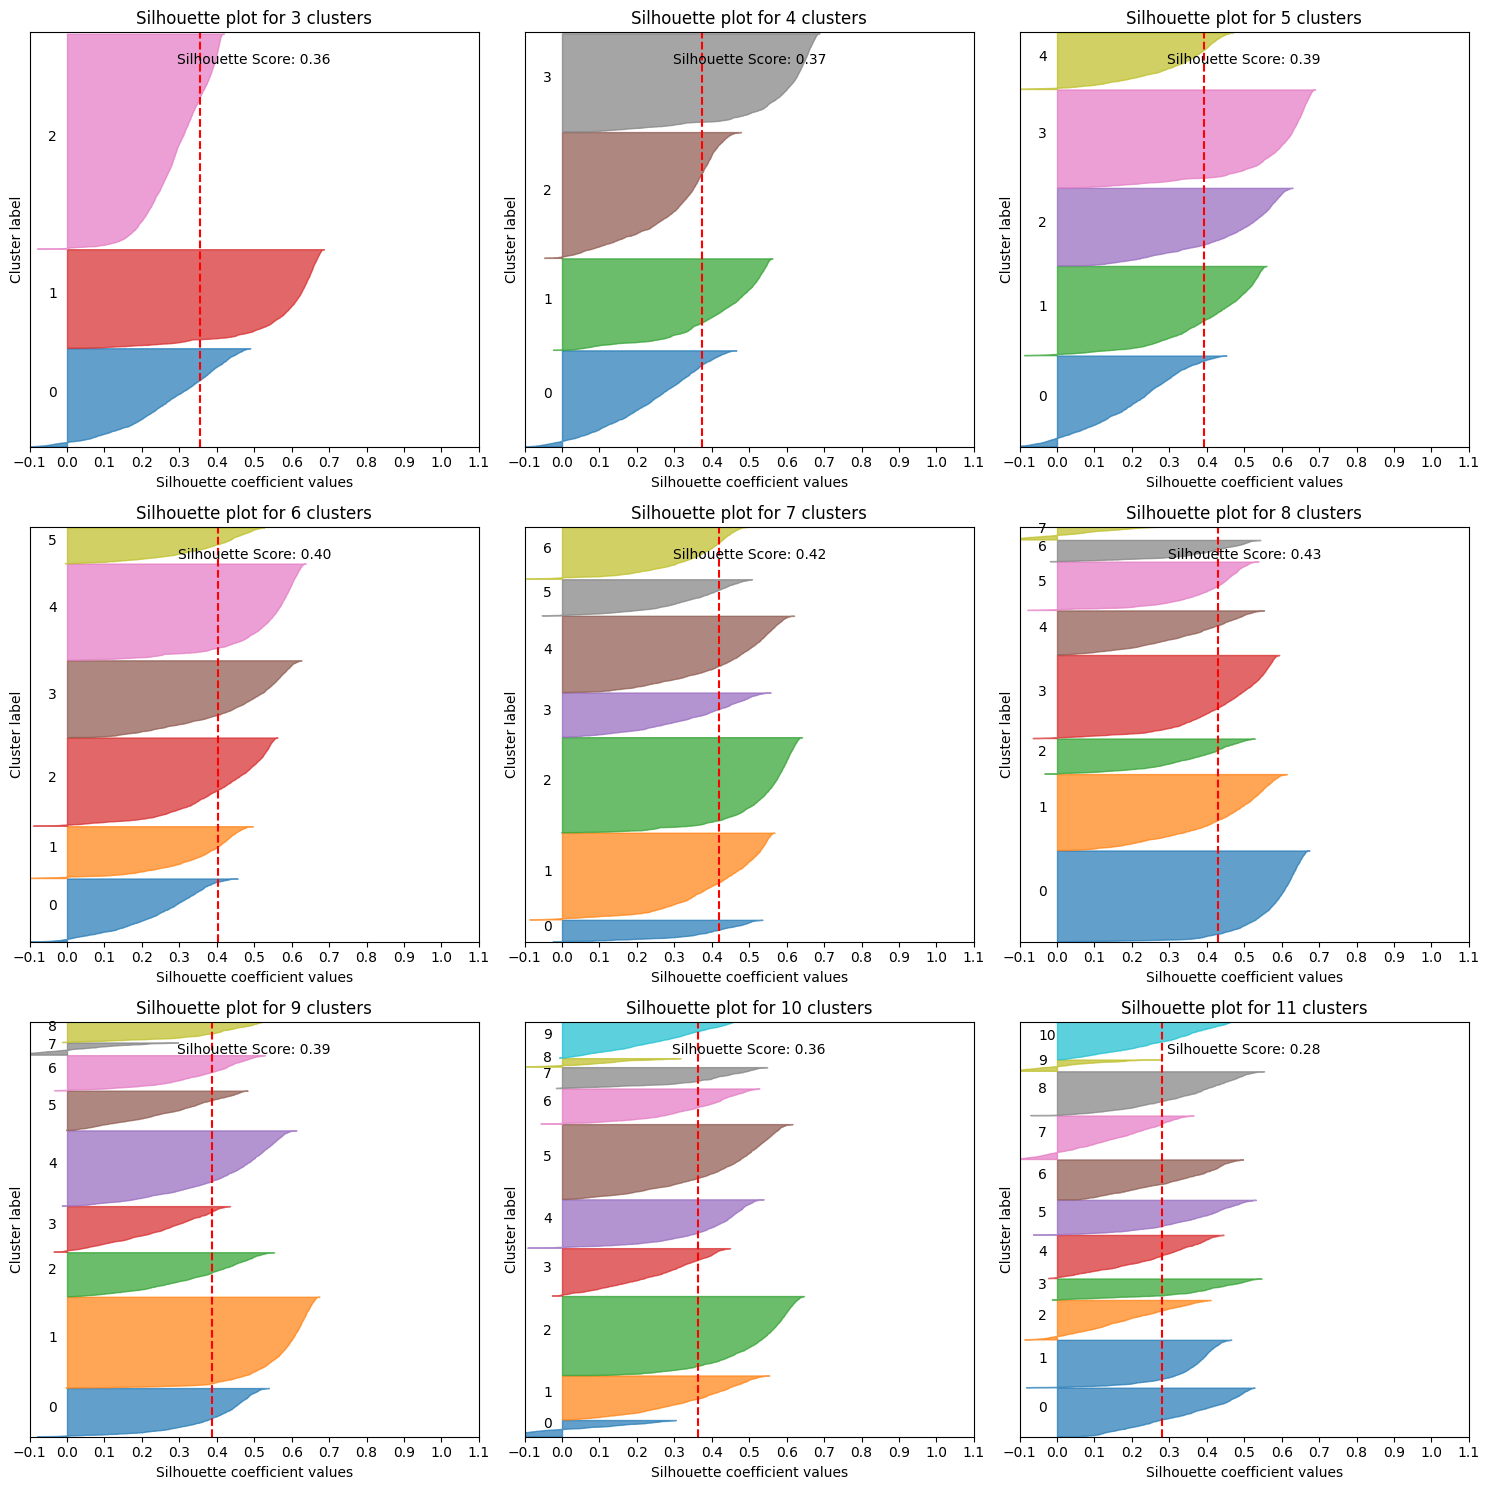

In [27]:
calc_plot_silhouette(log_scaled_data)

In [ ]:
#Actual Data

In [29]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, n_init=50)
    kmean.fit(df_copy.drop(columns='CUST_ID'))
    cost.append(kmean.inertia_)

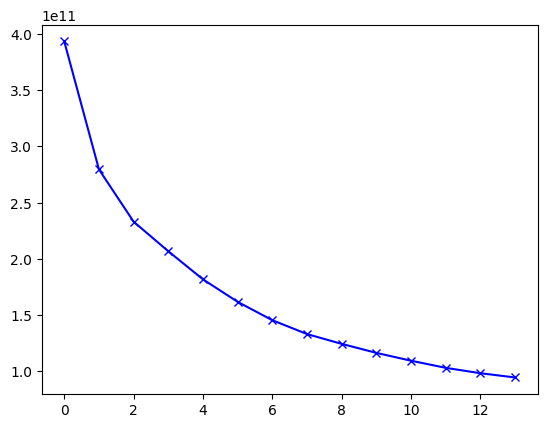

In [30]:
plt.plot(cost, 'bx-')

The average silhouette_score is : 0.46594612769858057 for 3 means
The average silhouette_score is : 0.46576699368758956 for 4 means
The average silhouette_score is : 0.3984340334621722 for 5 means
The average silhouette_score is : 0.3737890808501991 for 6 means
The average silhouette_score is : 0.3702552994574472 for 7 means
The average silhouette_score is : 0.3815424611905991 for 8 means
The average silhouette_score is : 0.35357694574774284 for 9 means
The average silhouette_score is : 0.35901038588660256 for 10 means
The average silhouette_score is : 0.36499782306212514 for 11 means


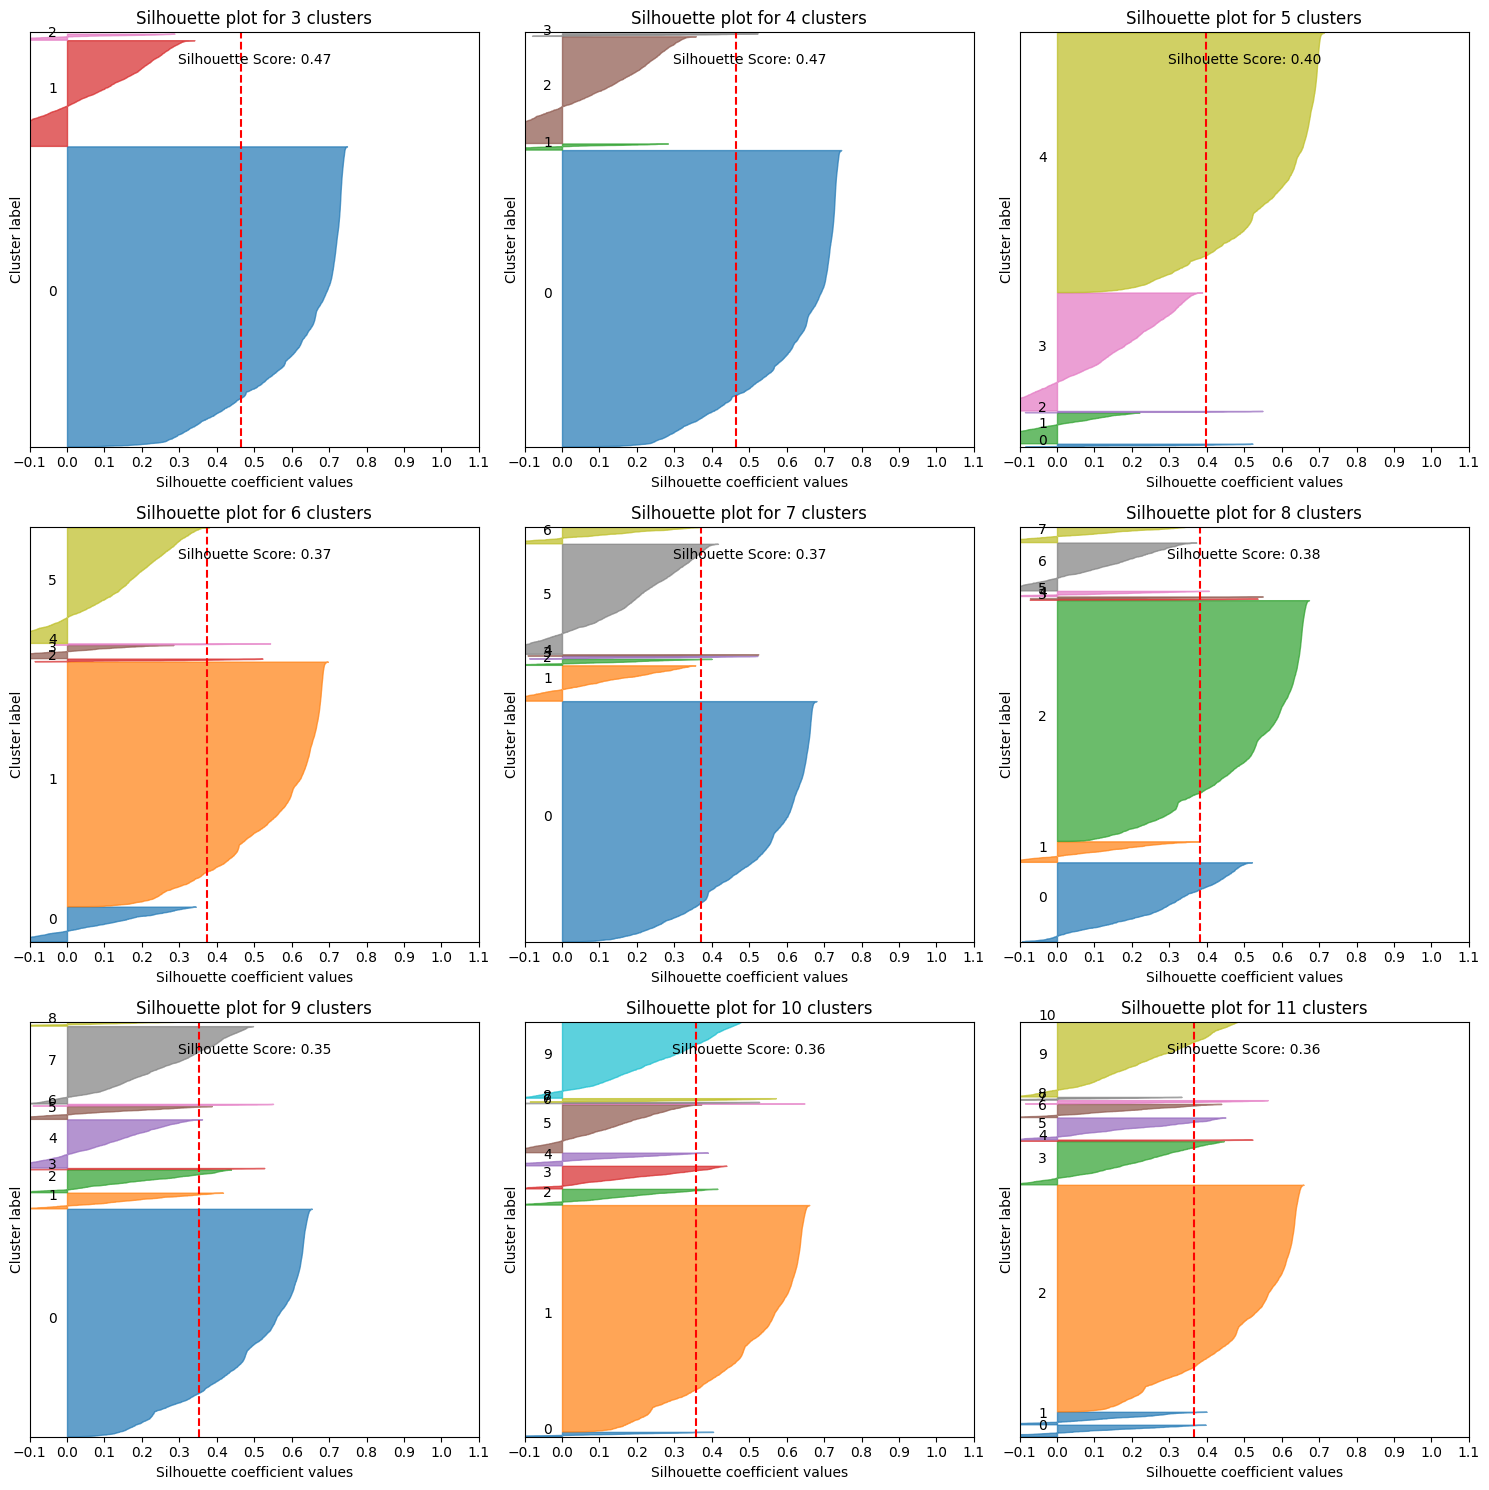

In [31]:
calc_plot_silhouette(df_copy)

In [ ]:
# normalization of data:

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_copy.drop(columns='CUST_ID'))
normalized_data = pd.DataFrame(normalized_data)
normalized_data['CUST_ID'] = df['CUST_ID']
normalized_data.drop()

In [60]:
normalized_data=normalized_data.drop(columns='CUST_ID')

In [61]:
normalized_data

0         1         2         3         4         5         6  \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

             7         8         9        10        11        12        13  \
0    -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1    -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2     2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3    -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4    -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.486217   
8946 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.503396   
8947 -0.678661  0.760469 -0.675349 -0.476070 -0.390639 -0.960433 -0.570615   
8948 -0.678661 -0.916995  0.157527 -0.182998 -0.591796 -1.097856 -0.580536   
8949  1.556082 -0.916995  0.990398 -0.182998  0.333524 -0.905464 -0.576869   

            14        15        16  
0    -0.297310 -0.525551  0.360680  
1     0.102042  0.234227  0.360680  
2    -0.088489 -0.525551  0.360680  
3    -0.357035 -0.525551  0.360680  
4    -0.252238 -0.525551  0.360680  
...        ...       ...       ...  
8945 -0.336106  1.183951 -4.122768  
8946 -0.357035 -0.525551 -4.122768  
8947 -0.321751  0.329200 -4.122768  
8948 -0.333166  0.329200 -4.122768  
8949 -0.319238 -0.525551 -4.122768  

[8950 rows x 17 columns]

In [33]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i, n_init=50)
    kmean.fit(normalized_data.drop(columns='CUST_ID'))
    cost.append(kmean.inertia_)

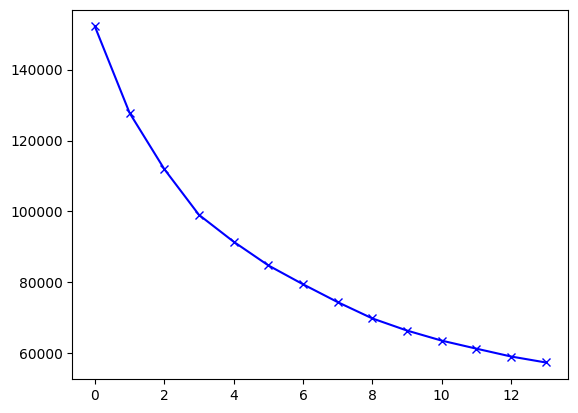

In [34]:
plt.plot(cost, 'bx-')

The average silhouette_score is : 0.25044690497981215 for 3 means
The average silhouette_score is : 0.1976733113552862 for 4 means
The average silhouette_score is : 0.19323894086574997 for 5 means
The average silhouette_score is : 0.20267817860813897 for 6 means
The average silhouette_score is : 0.21482009649826553 for 7 means
The average silhouette_score is : 0.2216497709279022 for 8 means
The average silhouette_score is : 0.22634233695974487 for 9 means
The average silhouette_score is : 0.22172123029036475 for 10 means
The average silhouette_score is : 0.2192387073731533 for 11 means


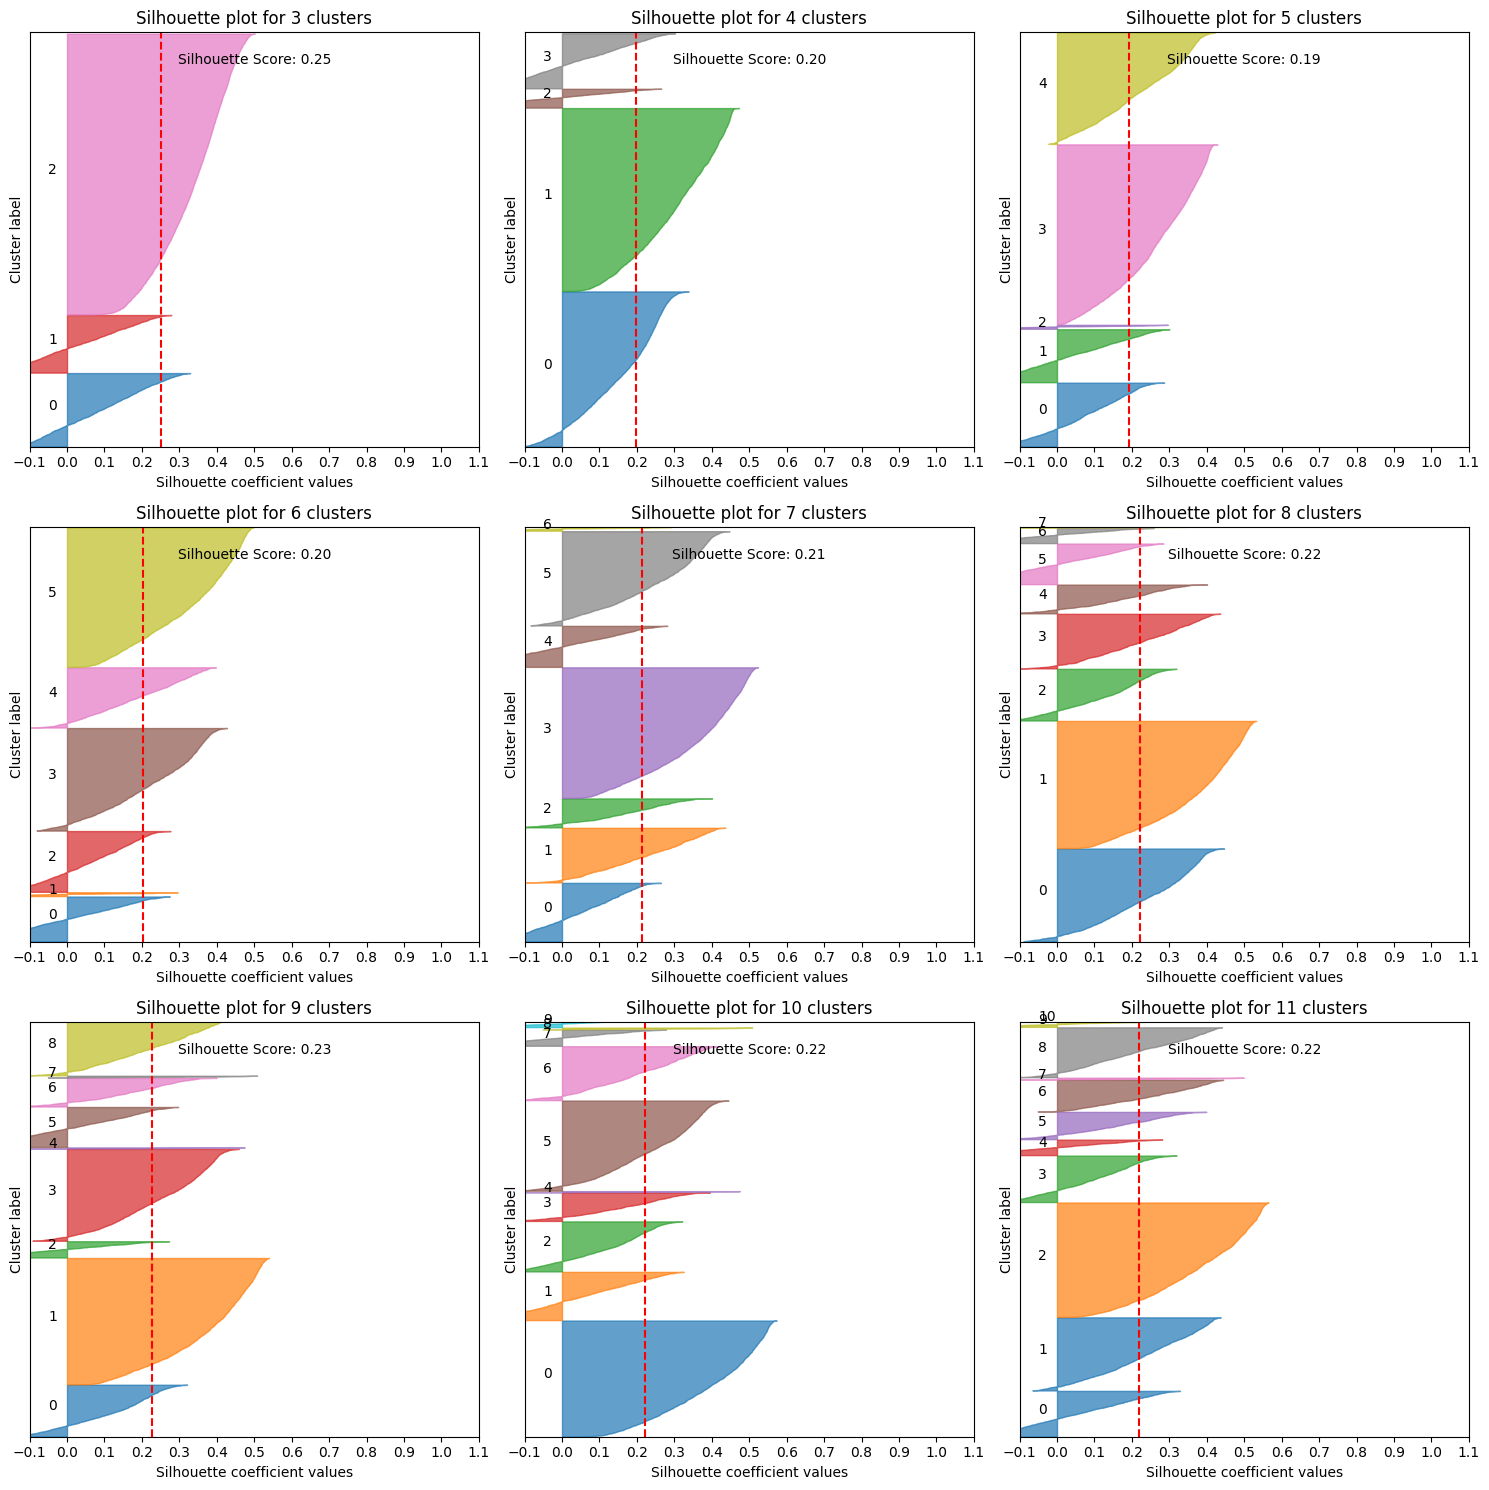

In [35]:
calc_plot_silhouette(normalized_data)

In [ ]:
#Applying Kmeans with K = 7 According to Log-scaled data Elbow, and silhouette score and graph

In [36]:
kmeans = KMeans(n_clusters=7, n_init=50, max_iter=1000)
kmeans.fit(log_scaled_data.drop(columns='CUST_ID'))

KMeans(max_iter=1000, n_clusters=7, n_init=50)

In [37]:
clusters = kmeans.labels_
len(clusters)

8950

In [39]:
labeled_df = pd.concat([df_copy.reset_index(drop=True), pd.DataFrame({'cluster': clusters})], axis=1)

In [40]:
print(labeled_df.shape)
print(labeled_df.isna().sum())

(8950, 19)
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
cluster                             0
dtype: int64


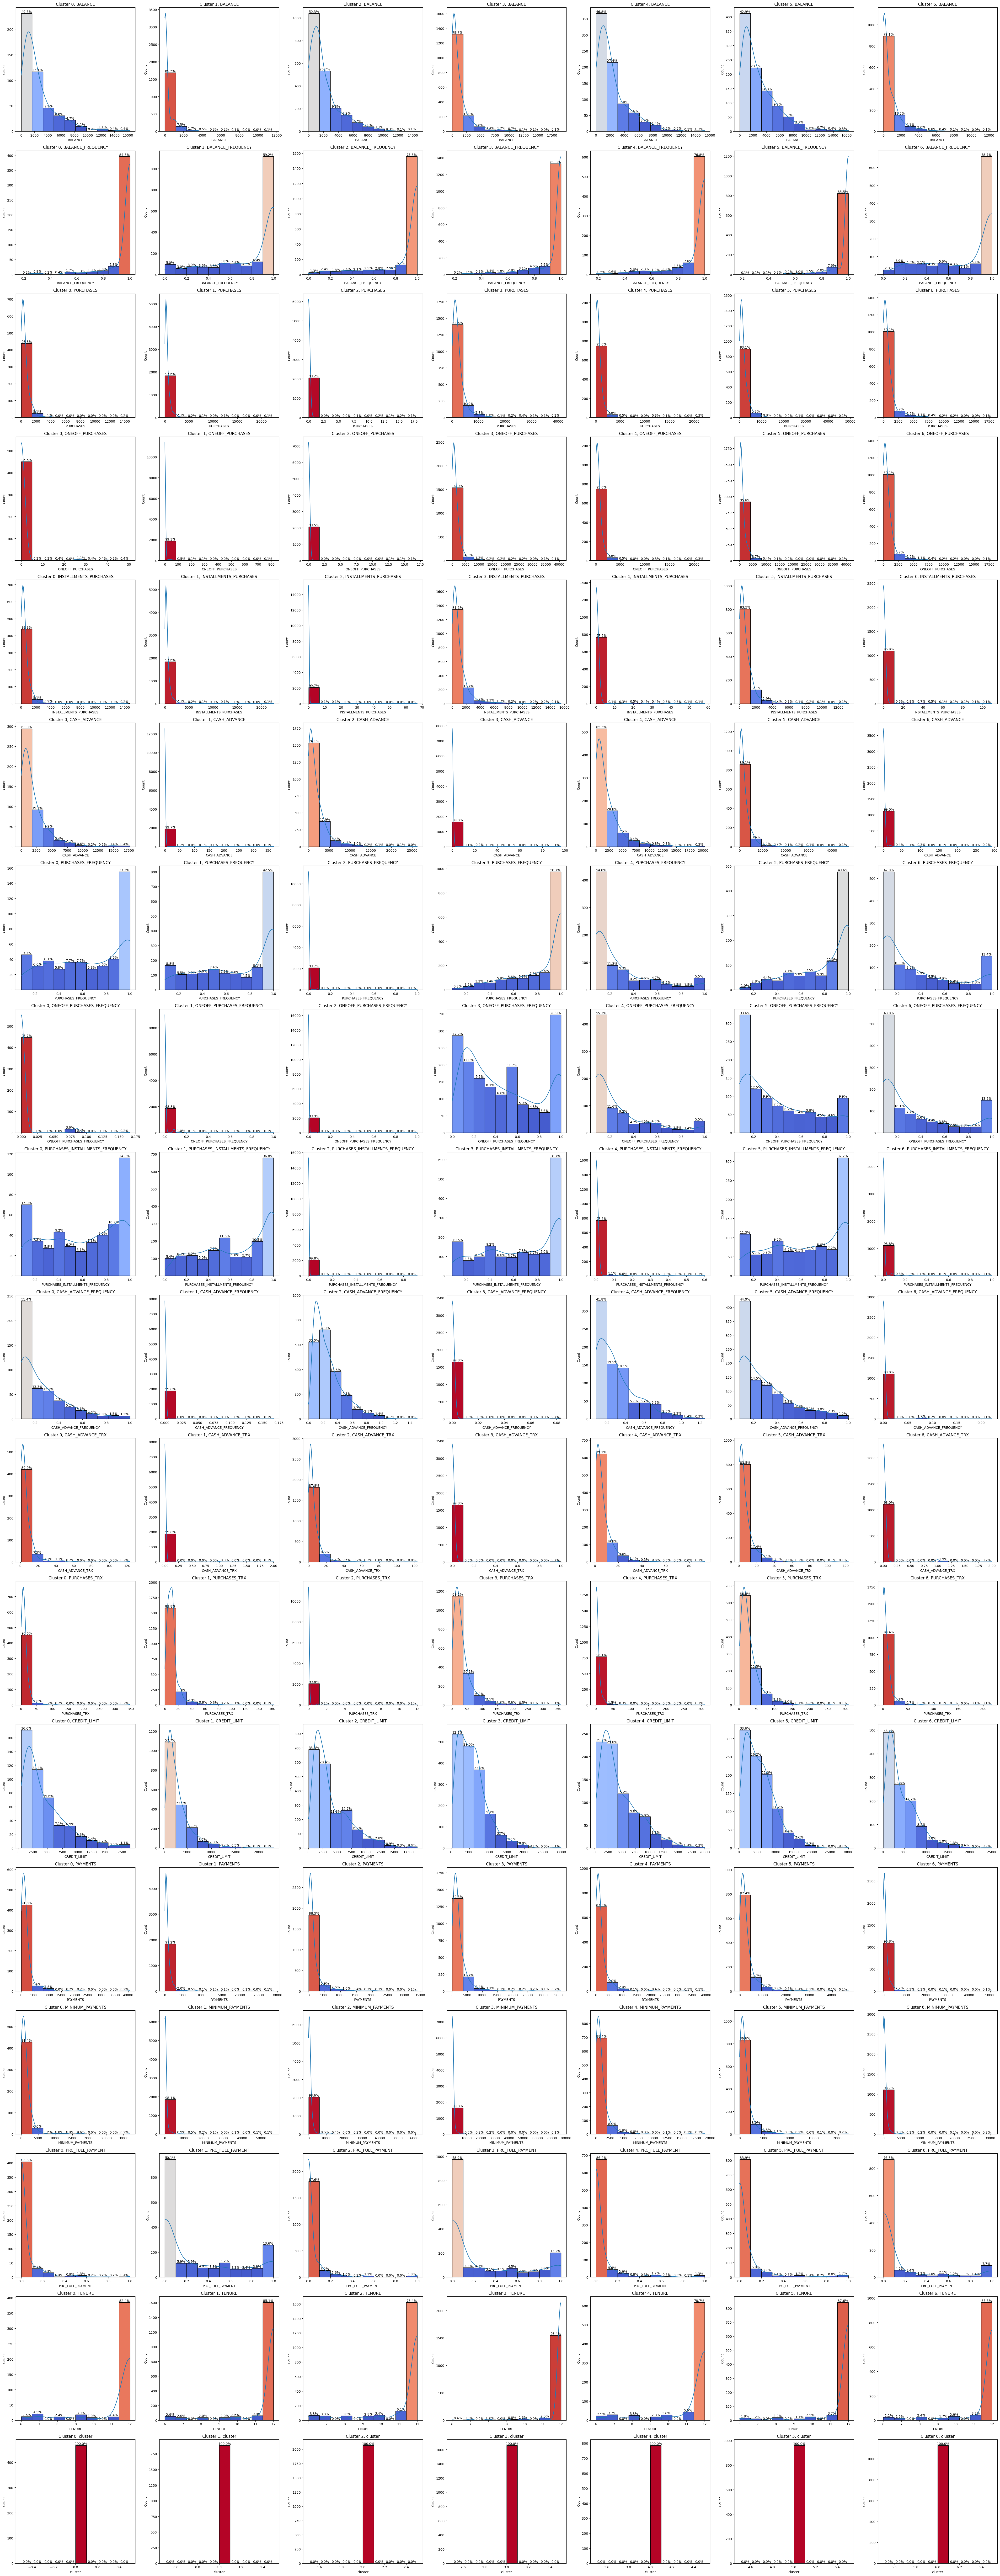

In [41]:
# Determine the maximum cluster value
max_cluster = labeled_df['cluster'].max()

num_rows = max_cluster + 1

num_columns = labeled_df.drop(columns='CUST_ID').shape[1]

fig, axes = plt.subplots(nrows=num_columns, ncols=num_rows, figsize=(6*num_rows, 6*num_columns))

for i in range(max_cluster + 1):
    filtered_df = labeled_df[labeled_df['cluster'] == i].drop(columns='CUST_ID')

    for j, col in enumerate(filtered_df.columns):
        sns.histplot(filtered_df[col], ax=axes[j, i], kde=True, bins=10)

        total_bin_height = sum(p.get_height() for p in axes[j, i].patches)

        cmap = plt.cm.coolwarm

        for p in axes[j, i].patches:
            percentage = p.get_height() / total_bin_height
            color = cmap(percentage)
            p.set_facecolor(color)

            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axes[j, i].annotate('{:.1f}%'.format(100 * percentage), (x, y), ha='center', va='bottom', fontsize=10, color='black')

        axes[j, i].set_title(f'Cluster {i}, {col}')

norm = plt.Normalize(0, 1)
plt.tight_layout()

plt.show()

fig.savefig('test.pdf')

In [ ]:
#Using T-SNE to see how they could be separated

In [42]:
colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'yellow',
          4: 'purple',
          5:'orange',
          6: 'black'}

names = {0: 'clients with Low cost purchases',
         1: 'clients who don\'t make installment purchases, with low Purchase frequency ',
         2: 'clients who don\'t make chas advance, with low balance and make some high oneoff purchases',
         3: 'clients who don\'t make any purchases, with low cost cash advance',
         4: 'clients who don\'t make oneoff purchases or cash advance, with low cost installment purchases, low credit limit',
         5:'clients make installment(high rate), one off(low rate) purchases, cash advance',
         6:'clients with Low balance, don\'t make installment purchases or cash advance'}

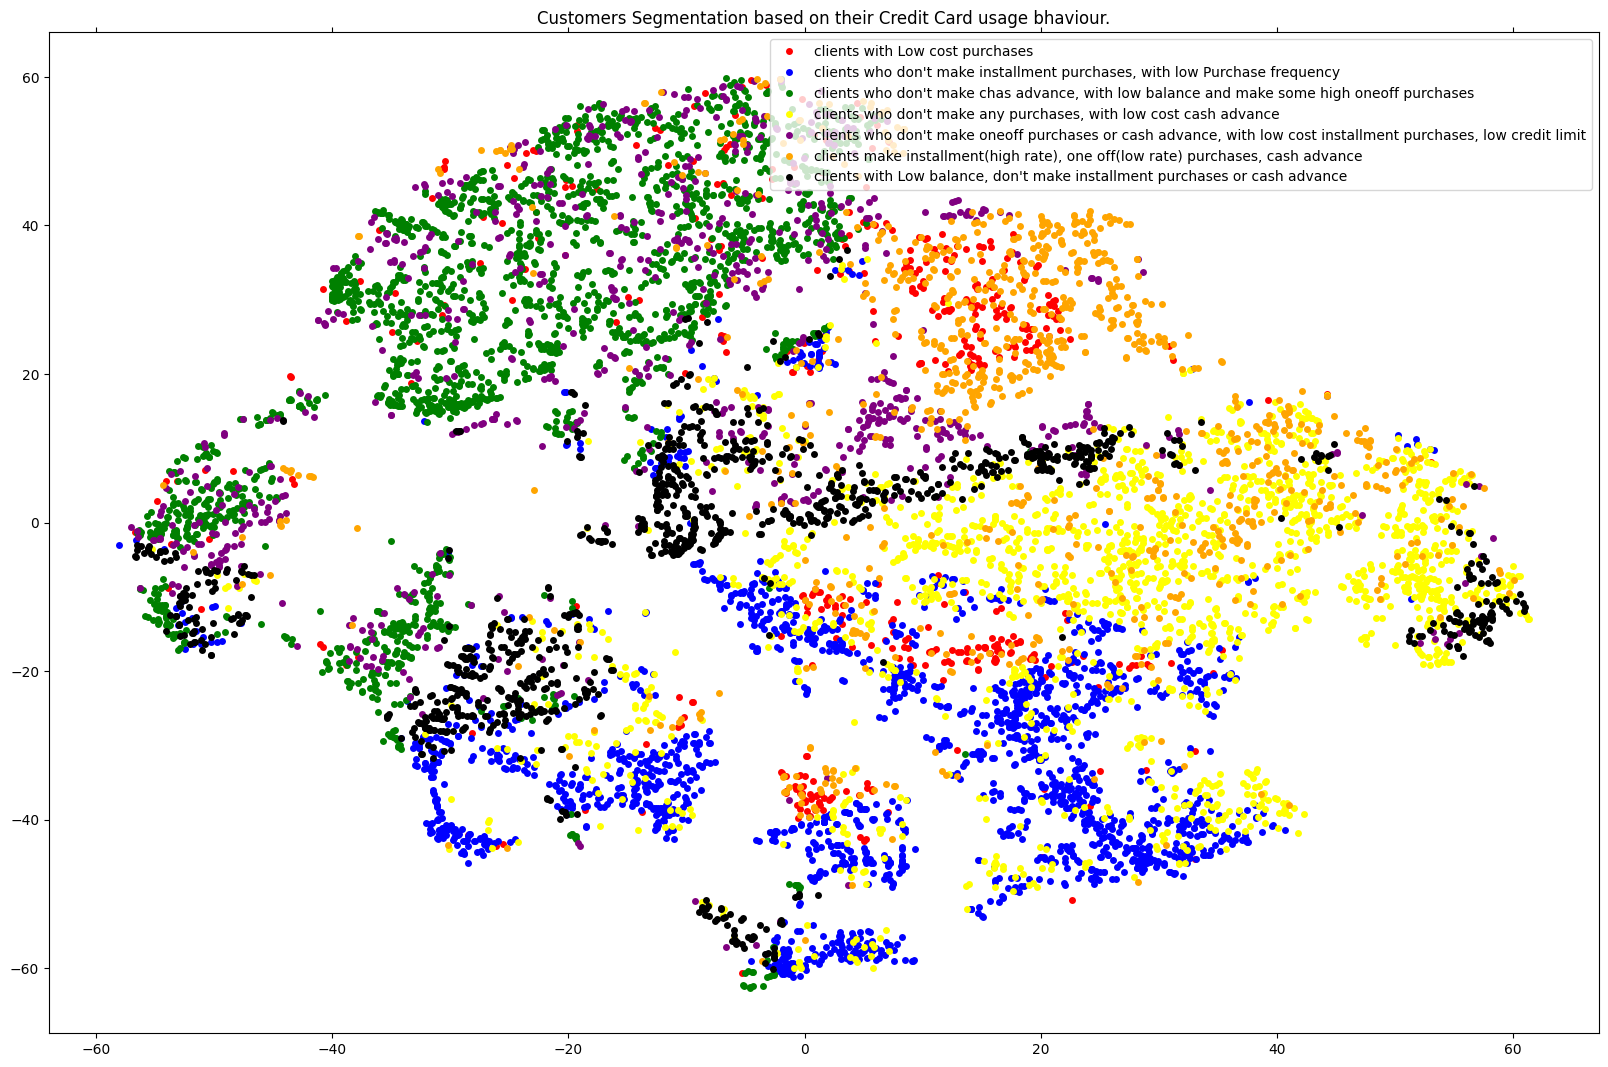

In [43]:
%matplotlib inline
tsne_2 = TSNE(n_components=2, perplexity=75)
X_tsne_2 = tsne_2.fit_transform(normalized_data.drop(columns='CUST_ID'))
x, y = X_tsne_2[:, 0], X_tsne_2[:, 1]

df_new = pd.DataFrame({'x': x, 'y':y, 'label':clusters})
groups = df_new.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [44]:
# Reduce dimensionality using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(log_scaled_data.drop(columns='CUST_ID'))
np.cumsum(pca.explained_variance_ratio_)

array([0.45983978, 0.69400394, 0.8313144 ])

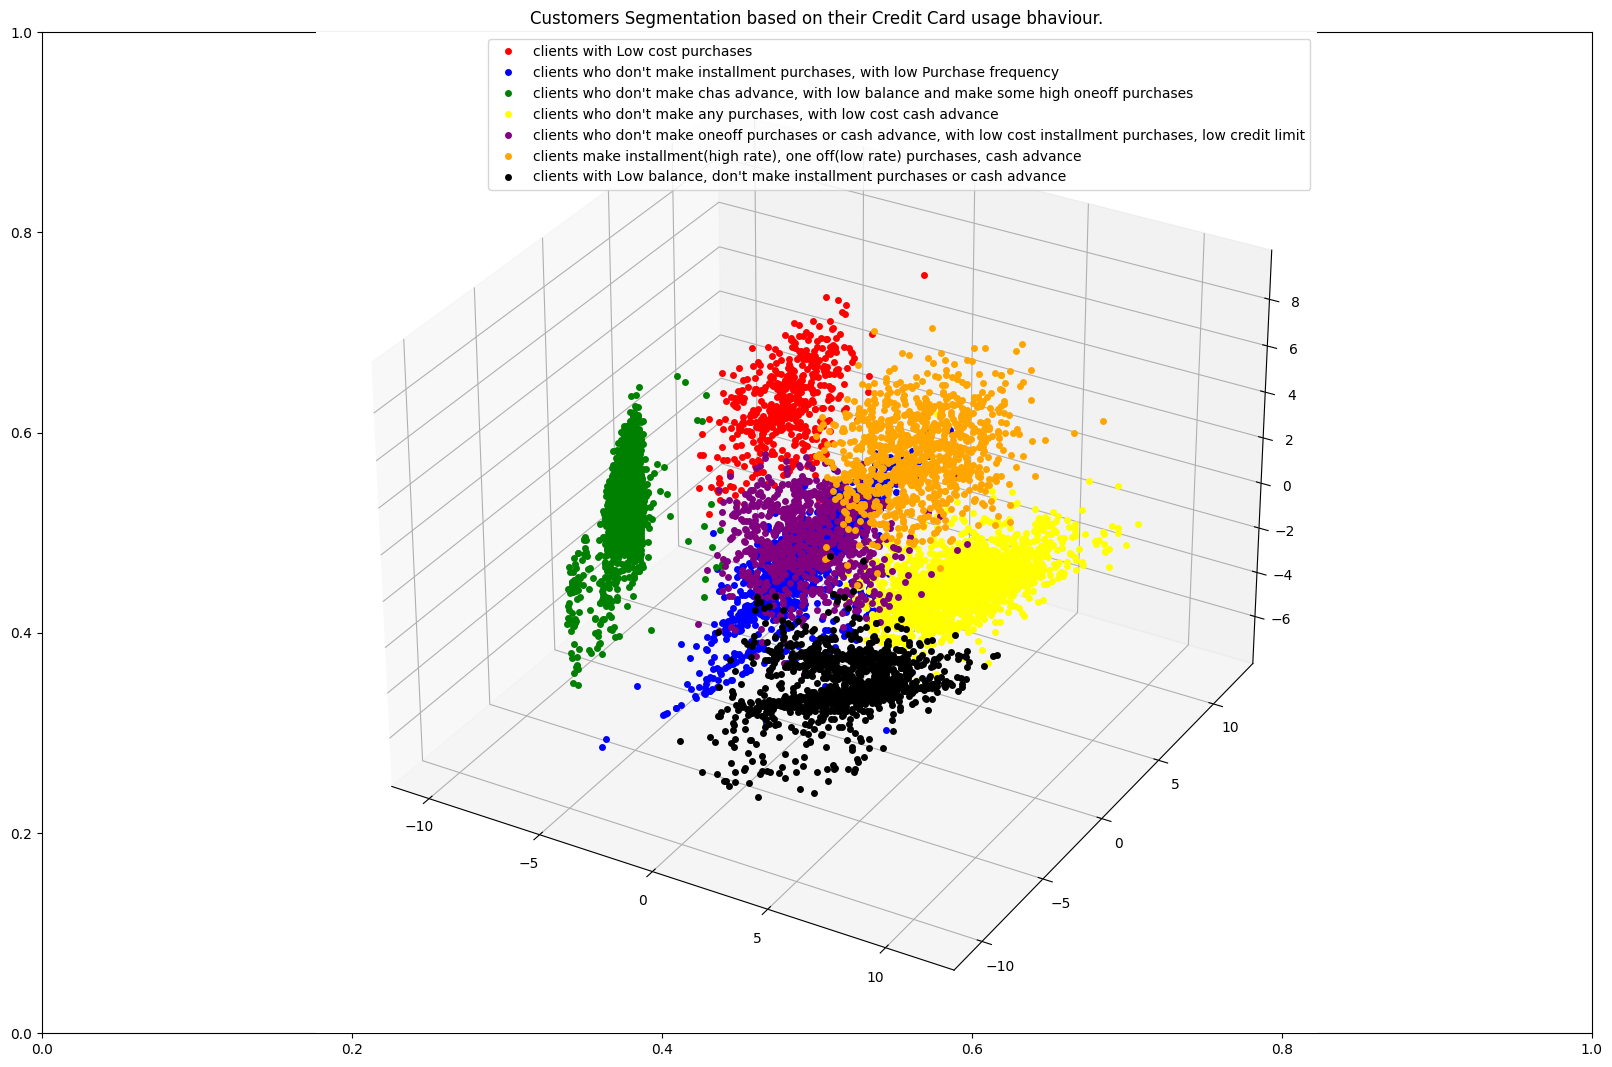

In [45]:
%matplotlib inline
x, y, z = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]

new_df = pd.DataFrame({'x': x, 'y':y, 'z':z,'label':clusters})
groups = new_df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))
ax = fig.add_subplot(projection='3d')
for name, group in groups:
    ax.plot(group.x, group.y, group.z, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [ ]:
#Drawing dendrograms

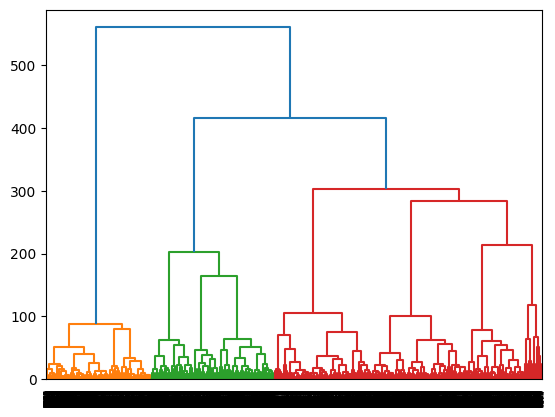

In [46]:
#1. Log scaled data
link_mat = ward(log_scaled_data.drop(columns='CUST_ID'))
dendrogram(link_mat)
plt.show()

In [ ]:
# It shows that 7 clusters might be the best choice

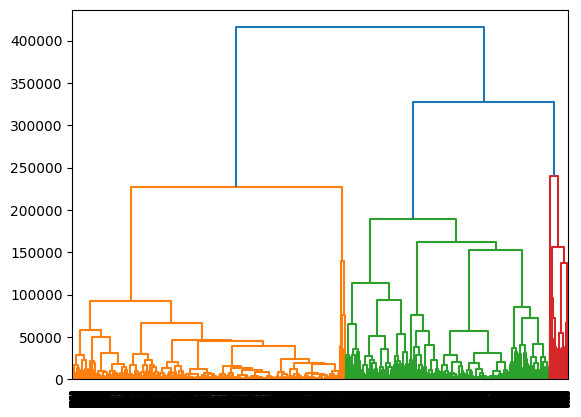

In [48]:
# 2. Actual data
link_mat = ward(df_copy.drop(columns='CUST_ID'))
dendrogram(link_mat)
plt.show()

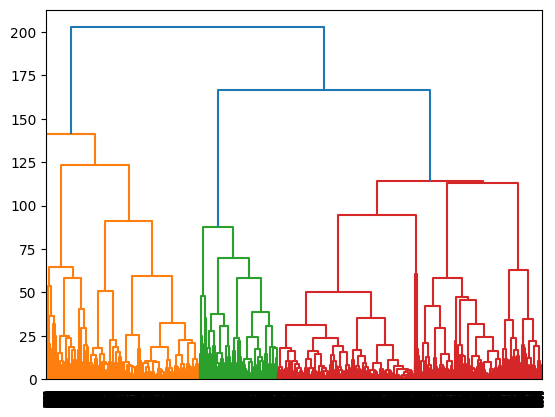

In [62]:
# 3. Normlized data:
link_mat = ward(normalized_data)
dendrogram(link_mat)
plt.show()

In [ ]:
# Applying DBSCAN Clustring algorithms :

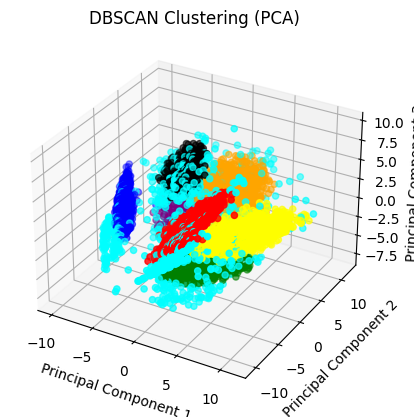

In [63]:


X = log_scaled_data.drop(columns='CUST_ID')

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Applying DBSCAN
dbscan = DBSCAN(eps=2.7, min_samples=120)
y_dbscan = dbscan.fit_predict(X)


colors = ['cyan', 'red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black']

cmap = ListedColormap(colors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_dbscan, cmap=cmap)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("DBSCAN Clustering (PCA)")
plt.show()


In [64]:
def plot_clusters_hist(clusters):
    clusters = np.array(clusters)
    unique_clusters, cluster_counts = np.unique(clusters, return_counts=True)
    sorted_indices = np.argsort(cluster_counts)[::-1]
    sorted_clusters = unique_clusters[sorted_indices]
    sorted_counts = cluster_counts[sorted_indices]

    plt.bar(range(len(sorted_clusters)), sorted_counts)
    plt.xlabel('Cluster')
    plt.ylabel('Frequency')
    plt.title('Histogram of Clusters (Sorted by Frequency)')
    plt.xticks(range(len(sorted_clusters)), sorted_clusters)

    plt.grid(True)
    plt.show()



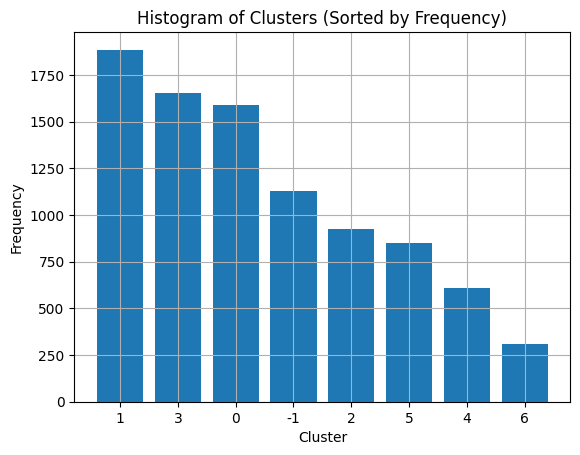

In [65]:
plot_clusters_hist(y_dbscan)

In [ ]:
#The graph above represent number of clients in each cluster due to DBSCAN Clustring,
# knowing that -1 bar is noise, which means it does not belong or represent any cluster

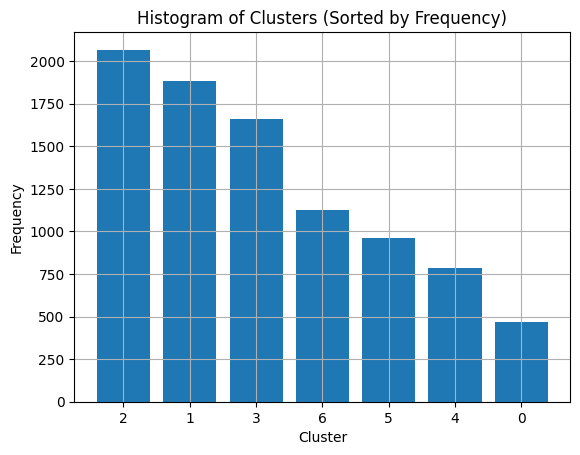

In [66]:
plot_clusters_hist(clusters)

In [ ]:
#The graph above represent number of clients in each cluster due to KMeans Clustring

In [67]:
y_dbscan[y_dbscan == -1].sum()

-1131

In [ ]:
#only 1131 Noise == 9.75% of the data, which is almost acceptable

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [ ]:
scalar = preprocessing.RobustScaler()
df_copy_scaled  = scalar.fit_transform(df_copy)

In [ ]:
#use pca to remove less useful features and end with 95% variance of the data

In [ ]:
df_pca = df_copy_scaled.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_pca)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.30301945 0.24333139 0.12352044 0.08045445 0.06992733 0.0536411
 0.03273653 0.02630537 0.0202241 ]
[393.08282843 352.24747427 250.96793041 202.54608223 188.83056732
 165.38559158 129.20077308 115.81665994 101.55080669]


In [ ]:
df_pca

array([[-2.57704244, -0.0091084 , -0.93709865, ...,  0.59671183,
        -0.13963253,  0.5349761 ],
       [-0.27471566,  1.82235437,  3.84862522, ...,  1.5649365 ,
        -1.62757772, -1.04137562],
       [-0.16942806, -0.31902449, -0.53032336, ...,  0.51279101,
         0.32219192, -1.47855233],
       ...,
       [-2.66494716, -0.48584228, -1.29295942, ..., -4.57540128,
        -2.75938623, -0.31938169],
       [-2.95490889, -0.22516295, -0.6753003 , ..., -4.71532657,
        -2.47967088,  0.21116182],
       [-1.1064939 , -1.31145314, -0.40585088, ..., -5.27983858,
        -1.19614288, -1.54428366]])

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=... , method=...,metric=...),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering





## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method